In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd
import matplotlib

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

## AVALANCHE SIZE, DURATION 
* avalanche size and duration distributions are log-linear

In [107]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
bln_size_powlist = sorted(glob.glob('*BLN*size*_power*'))
bln_dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
p20_size_powlist = sorted(glob.glob('*PTZ20*size*_power*'))
p20_dur_powlist = sorted(glob.glob('*PTZ20*dur*_power*'))
p20list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_av.npy']

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

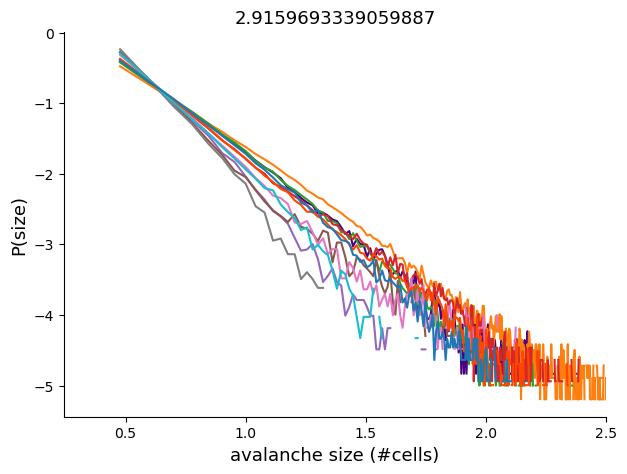

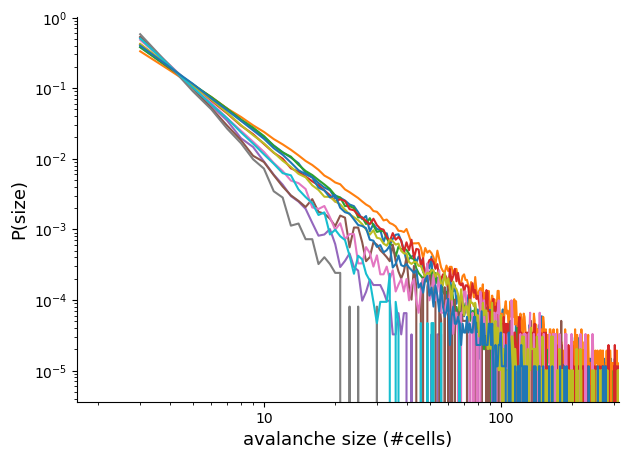

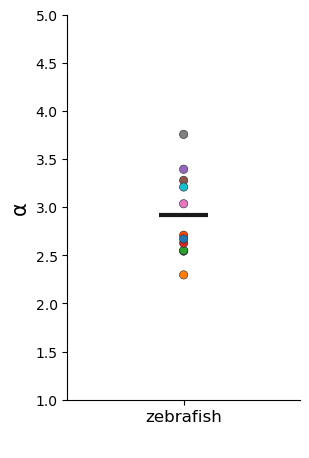

In [183]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(bln_size_powlist)):
    blnexp = np.append(blnexp, np.load(bln_size_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
bln_size_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(blnexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 2.5)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 316)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=bln_size_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(bln_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

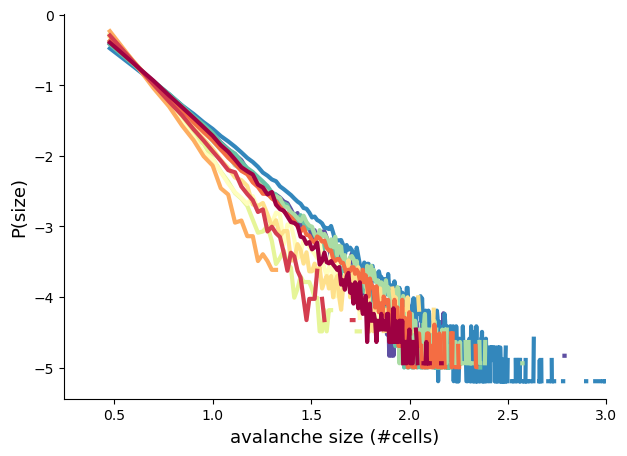

In [80]:
import matplotlib
from matplotlib import cm

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
#axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 3)  
plt.savefig('av_size.svg', transparent = True)
plt.show()


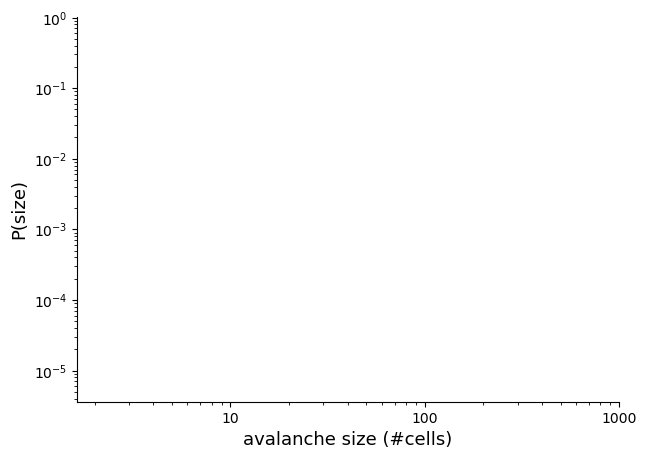

In [77]:
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'white')
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 1000)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_axis.svg', transparent = True)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

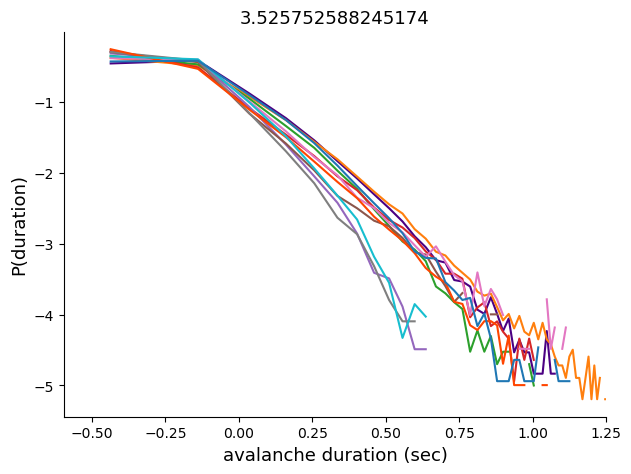

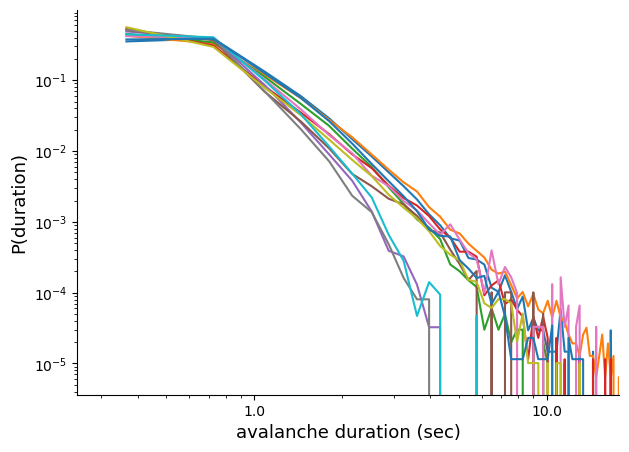

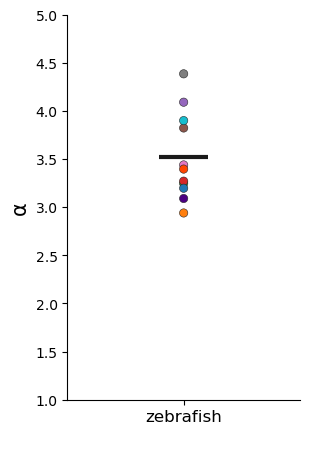

In [184]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(bln_dur_powlist)):
    blnexp = np.append(blnexp, np.load(bln_dur_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
bln_dur_slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(blnexp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 17.7)  
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=bln_dur_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(bln_dur_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dominicburrows/anacon

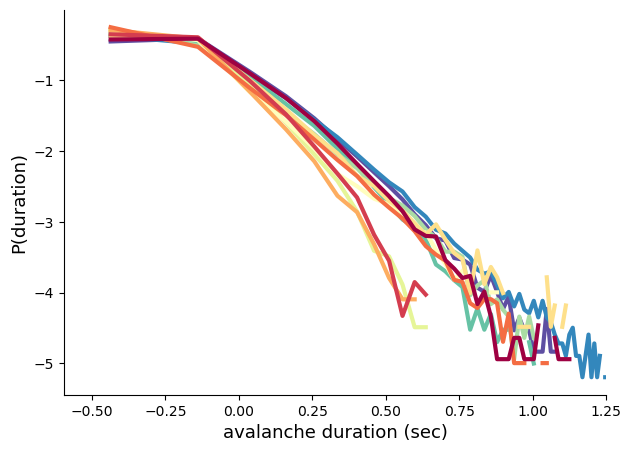

In [91]:
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, markersize = 1, alpha = 1, c = colors[i])
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 1.25)  
plt.savefig('av_dur.svg', transparent = True)
plt.show()

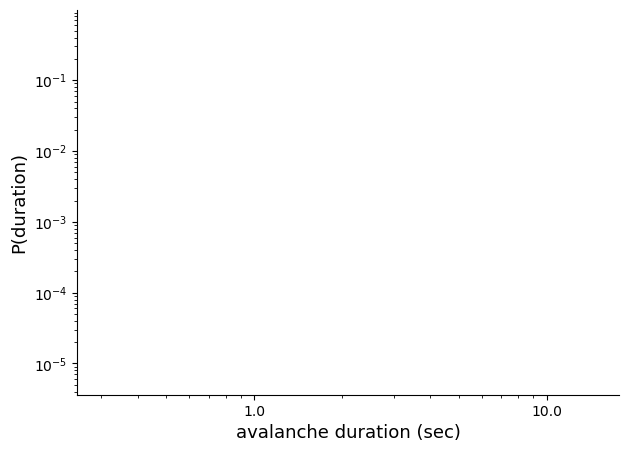

In [92]:
fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = 'white')
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 17.7)  
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_dur_axes.svg', transparent = True)
plt.show()

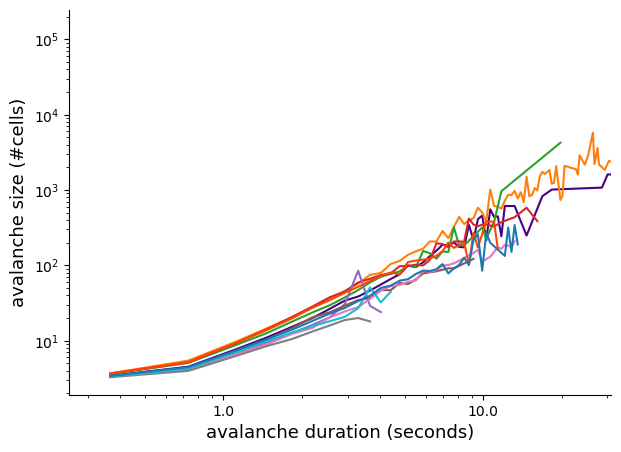

In [114]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

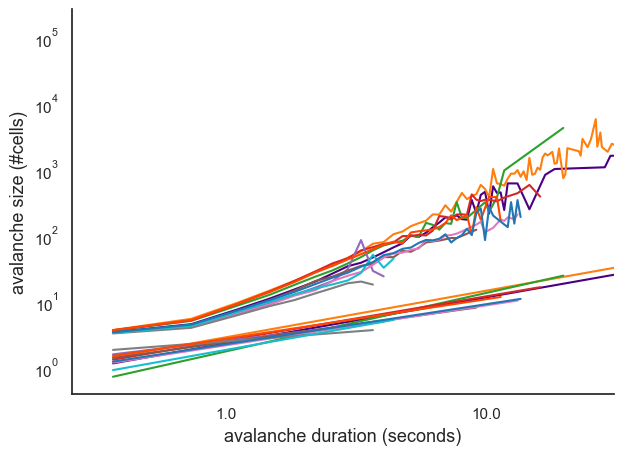

In [219]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))
bln_fit = list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1])[5:], np.log10(yaxis[:len(xaxis)-1])[5:], 1)
    y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    bln_fit[i] = m

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

In [116]:
def DCC(dur, size):
    Beta = (dur - 1)/(size - 1)
    return(Beta)

In [117]:
bln_pred = []
dur = bln_dur_slopedf['α']
size = bln_size_slopedf['α']
for i in range(len(dur)):
    bln_pred = np.append(DCC(dur[i], size[i]), bln_pred)

In [118]:
abs(bln_fit - bln_pred)

array([0.23963019, 0.32238484, 0.24682718, 0.25920331, 0.04880045,
       0.00116194, 0.01913889, 0.5173197 , 0.06352745, 0.37664293,
       0.0353725 ])

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

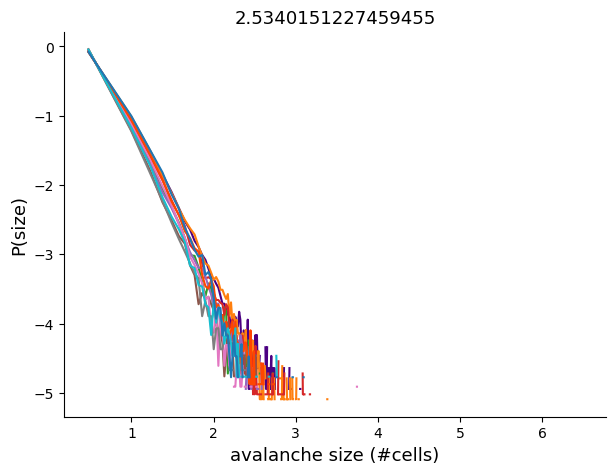

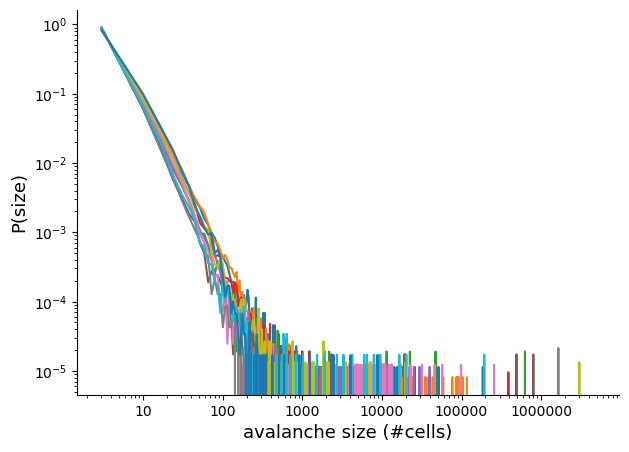

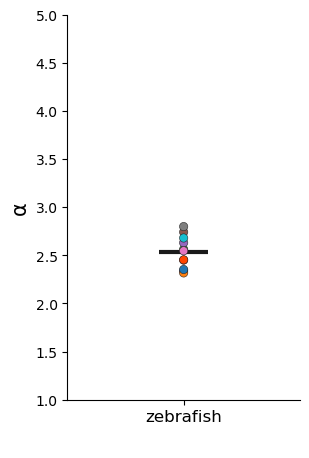

In [186]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
p20exp = []
for e in range(len(p20_size_powlist)):
    p20exp = np.append(p20exp, np.load(p20_size_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": p20exp, "Fish": fli,  "condition": adfn.repeat_list('p20',11)}
p20_size_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, np.load(p20list[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(p20list)):
    avdistcut = np.load(p20list[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(p20exp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.xlim(right = 2.5)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, np.load(p20list[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(p20list)):
    avdistcut = np.load(p20list[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 316)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=p20_size_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(p20_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

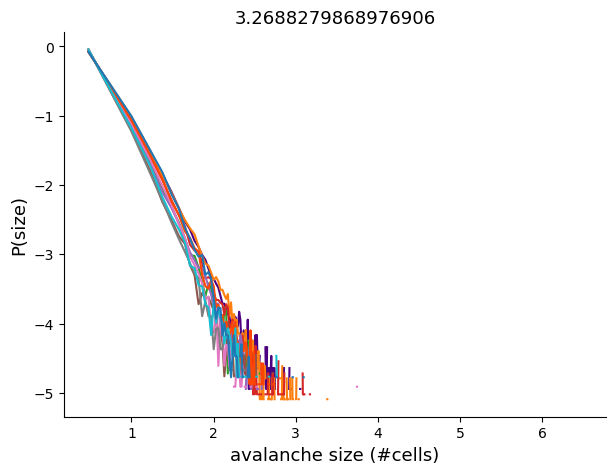

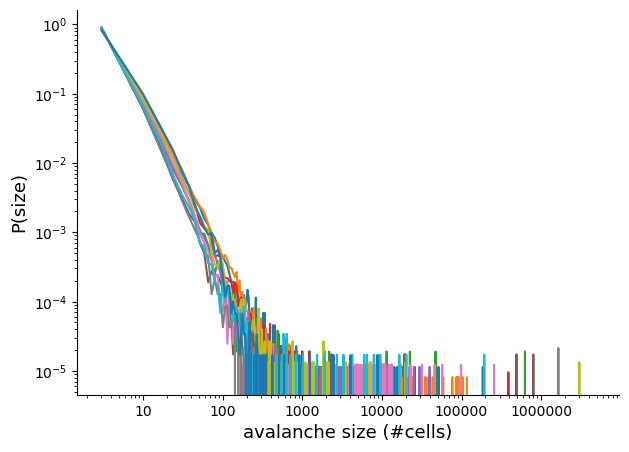

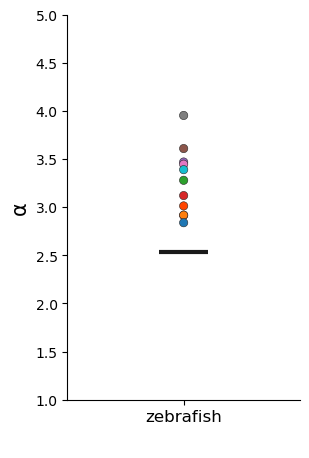

In [187]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
p20exp = []
for e in range(len(p20_dur_powlist)):
    p20exp = np.append(p20exp, np.load(p20_dur_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": p20exp, "Fish": fli,  "condition": adfn.repeat_list('p20',11)}
p20_dur_slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, np.load(p20list[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(p20list)):
    avdistcut = np.load(p20list[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(p20exp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.xlim(right = 2.5)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(p20list)):
    binvec = np.append(binvec, np.load(p20list[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(p20list)):
    avdistcut = np.load(p20list[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 316)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=p20_dur_slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(p20_size_slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

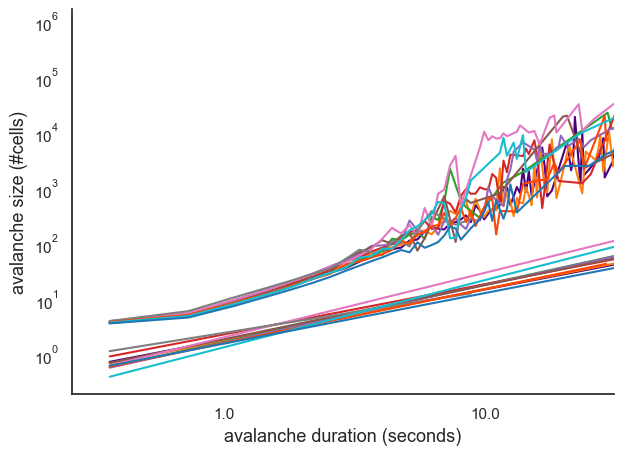

In [222]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))
p20_fit = list(range(len(blnlist)))

for i in range(len(p20list)):    
    avsize = np.load(p20list[i])[0]
    avdur = (1/2.73)*np.load(p20list[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1])[5:], np.log10(yaxis[:len(xaxis)-1])[5:], 1)
    y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])
    p20_fit[i] = m

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

In [223]:
bln_pred = []
dur = bln_dur_slopedf['α']
size = bln_size_slopedf['α']
for i in range(len(dur)):
    bln_pred = np.append(DCC(dur[i], size[i]), bln_pred)
bln_diff = abs(bln_fit - bln_pred)
bln_diff

array([0.28851681, 0.31017627, 0.63331031, 0.31029827, 0.10504446,
       0.01993846, 0.10044655, 0.7051229 , 0.07048126, 0.12691759,
       0.04009284])

In [224]:
p20_pred = []
dur = p20_dur_slopedf['α']
size = p20_size_slopedf['α']
for i in range(len(dur)):
    p20_pred = np.append(DCC(dur[i], size[i]), p20_pred)
p20_diff = abs(p20_fit - p20_pred)
p20_diff

array([0.73672248, 0.72788471, 1.00771986, 0.45213639, 0.8138768 ,
       0.75330924, 1.17263476, 0.27617325, 0.79312682, 1.34336801,
       0.67358449])

In [225]:
#SIZE - KS
listlist = [bln_diff, p20_diff]
dcc = np.zeros((22))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
listlist = [bln_diff, p20_diff]
    
dccdf = {}
count=0
for i in range(len(listlist)):
    for y in range(11):
        dcc[count] = listlist[i][y]
        count+=1
dcc_pd = pd.DataFrame({"DCC": dcc , "Labels":  np.append(adfn.repeat_list('Baseline',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

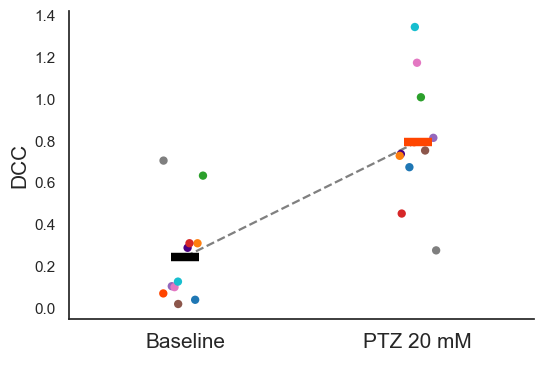

In [226]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_pd, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="DCC", data=dcc_pd, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_pd, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
plt.show()

In [202]:
adfn.ttest(dcc_pd, 'Labels', 'DCC', ['Baseline', 'PTZ 20mM'], mode='single')

[[-4.076280943384168,
  0.0022276136671672635,
  0.05,
  'Significant',
  'Baseline - PTZ 20mM']]

### Power law quantification
* duration and size of avalanches are better explained by power laws than lognormal

In [93]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_size_marglik_power.npy']

In [158]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)


for i in range(len(size_powlist)):
    size_list[i] =  np.load(size_powlist[i],allow_pickle=True)[1] - np.load(size_loglist[i],allow_pickle=True)[2]
    #dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":size_list ,"Fish": fli, "Labels": adfn.repeat_list('Size', 11)})

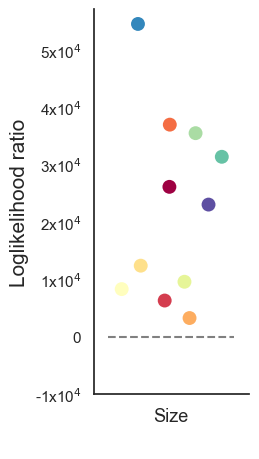

In [180]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig('llr_size.svg', transparent = True)
plt.show()

In [181]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)


for i in range(len(size_powlist)):
    dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":dur_list ,"Fish": fli, "Labels": adfn.repeat_list('Size', 11)})

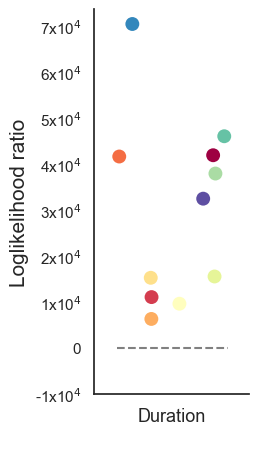

In [182]:
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
sns.set(style="white")
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 10, jitter = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Duration'], size = 13)
plt.hlines(1, -0.1 ,0.1, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.savefig('llr_dur.svg', transparent = True)
plt.show()

# Connectivity-distance
* np.corrcoeff function for entire matrix 
* bin data on linear scale 
* ignore negative correlations
* exponent match theory

In [12]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist*'))
binlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy']

In [ ]:
#Calculate euclidean distance
#for e in range(len(coordlist)):
#    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
#    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
#for e in range(len(distlist)):
#    corr = np.corrcoef(np.load(tracelist[e]))
#    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
#    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
#    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

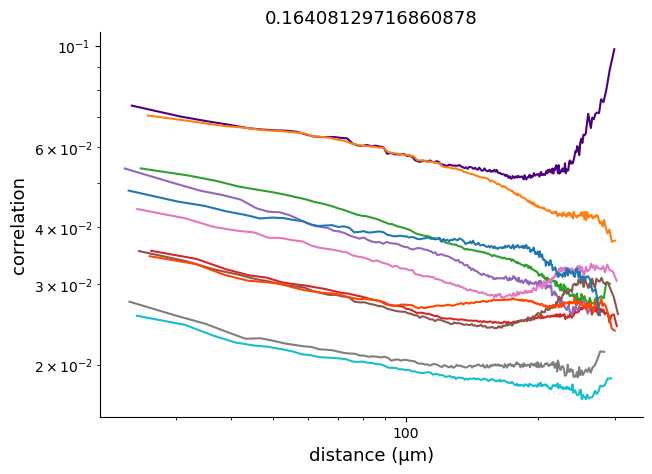

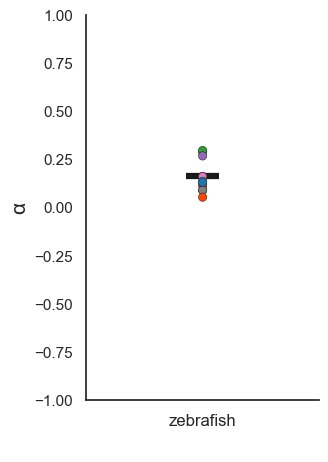

In [13]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(-1,1)
plt.show()

In [19]:
np.load(binlist[0])

array([[1.40340620e+01, 2.37862387e+01, 3.06584332e+01, 3.54323373e+01,
        3.98306456e+01, 4.38985919e+01, 4.73578037e+01, 5.06216420e+01,
        5.36862368e+01, 5.65853416e+01, 5.94078392e+01, 6.19668928e+01,
        6.44681309e+01, 6.68792664e+01, 6.92056855e+01, 7.14506184e+01,
        7.36374208e+01, 7.57683567e+01, 7.77876052e+01, 7.97770467e+01,
        8.17194567e+01, 8.36273165e+01, 8.54886602e+01, 8.72998988e+01,
        8.90804675e+01, 9.08281106e+01, 9.25290992e+01, 9.41970852e+01,
        9.58415795e+01, 9.74605054e+01, 9.90502959e+01, 1.00617256e+02,
        1.02156990e+02, 1.03678501e+02, 1.05191674e+02, 1.06654299e+02,
        1.08109382e+02, 1.09544738e+02, 1.10959791e+02, 1.12353724e+02,
        1.13729666e+02, 1.15097529e+02, 1.16450792e+02, 1.17780930e+02,
        1.19097067e+02, 1.20408098e+02, 1.21688821e+02, 1.22964221e+02,
        1.24222536e+02, 1.25468978e+02, 1.26707448e+02, 1.27930895e+02,
        1.29144098e+02, 1.30347047e+02, 1.31535188e+02, 1.327178

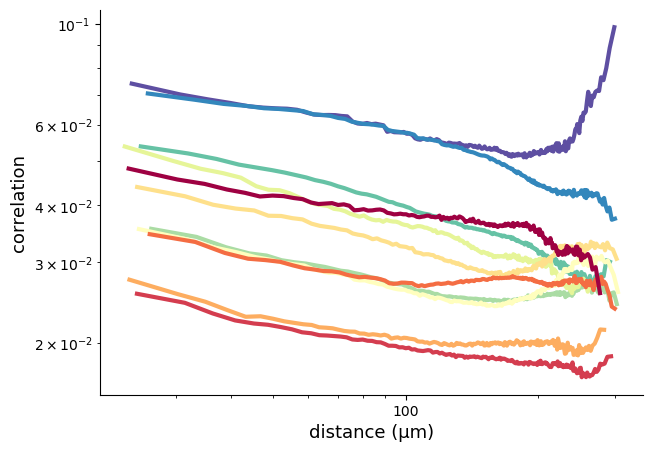

In [20]:
import matplotlib
from matplotlib import cm

colors  = cm.Spectral_r(np.linspace(0,1,len(binlist)))
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('fcd.svg', transparent = True)
plt.show()

# Eigenspectrum
* Baseline PCA variance plots - exponent calculation
* behaviour PCA variance

In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

In [ ]:
#Calculate entire trace PC-variance
#blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
#for e in range(len(blnraw)):
#    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
#    n_components = b_data.shape[1]
#    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
#    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
#    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
#    print('Saved fish #' + str(e))

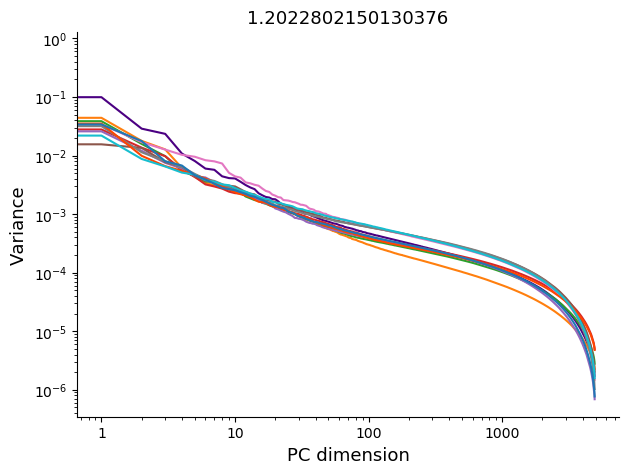

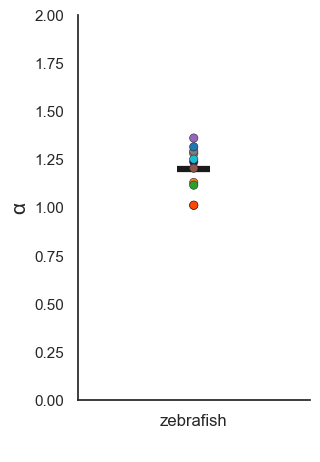

In [184]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(slope)), size = '13')
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(0,2)
plt.show()


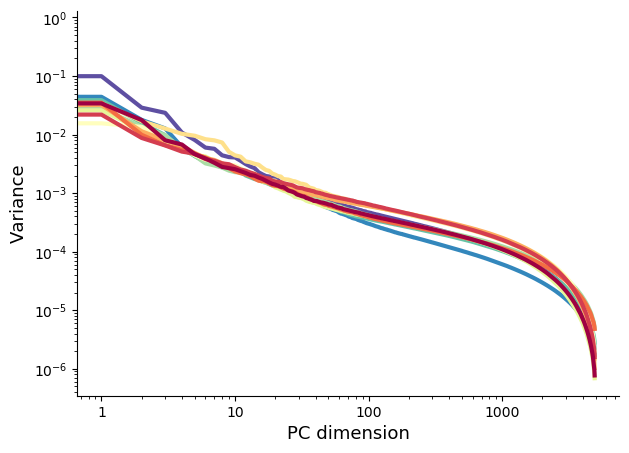

In [190]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 3, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('eigspec.svg', transparent = True)
plt.show()


In [4]:
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


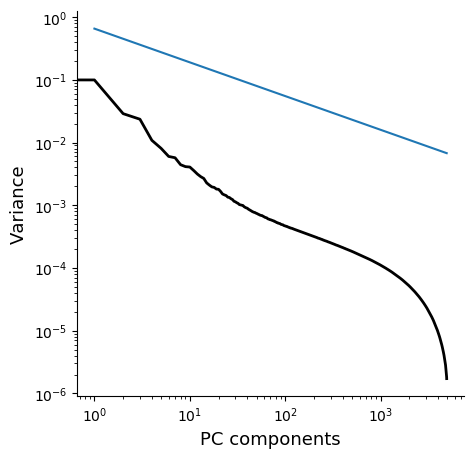

-1.2385028567840863 -0.4245119070803723


(0.7000335601977256, 0.0)

In [10]:
fig, axarr = plt.subplots(figsize = (5,5))
data = np.load(blnpcv[0])
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'k')

m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
print(m,c)
from scipy import stats
stats.pearsonr(yaxis[1:], y_fit[1:])

In [11]:
y_fit

array([       inf, 0.65408896, 0.45052648, ..., 0.00676471, 0.00676397,
       0.00676323])

In [ ]:
for i in range(len(blnpcv)):
    
    fig, axarr = plt.subplots(figsize = (5,5))
    data = np.load(blnpcv[0])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'k')

    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
    y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 


# Branching ratio
* branching ratio is close to critical value (1)

In [108]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [109]:
import pandas as pd
all_list = [blnbranchlist]
blist = adfn.list_of_list(1,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

branchdic = {
  "branch ratio": blist[0], "condition": adfn.repeat_list('baseline',11), "Fish": fli}
branchdf = pd.DataFrame(branchdic)
branchdf

,branch ratio,condition,Fish
0,0.986667,baseline,F2
1,1.089033,baseline,F3
2,1.020179,baseline,F4
3,1.033049,baseline,F5
4,0.838542,baseline,F6
5,0.883468,baseline,F7
6,0.906975,baseline,F8
7,0.797831,baseline,F9
8,1.017794,baseline,F10
9,0.862305,baseline,F11


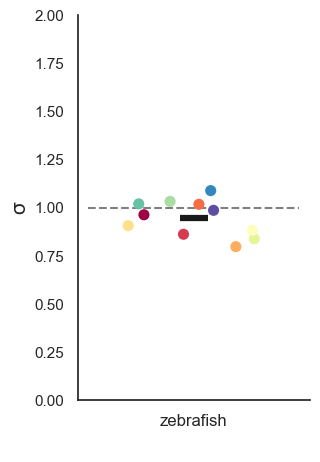

In [152]:
import matplotlib 
import seaborn as sns
#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish',palette = colors, jitter = True, size = 8, alpha = 1)
plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.15 ,0.15, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
plt.ylim(0,2)
ax.legend_.remove()
plt.savefig('BR_baseline.svg', transparent = True)
plt.show()